In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

9.114756270715304 -28.760533905489467
49.889595141216375 -1.014536050754515
-47.39942231282376 168.66161930451318
-88.85052159301686 124.3716690487829
75.34554216475385 -4.3956250964192805
88.24529405028463 111.10176757133877
-30.850435941288637 -156.1797770511091
-75.72619822453271 116.53533901927841
83.97350130005606 23.198051580891587
2.5712618426382505 36.1114092624251
16.058107823189346 107.18990665993311
74.44162391003479 -150.1433691427196
-53.10367072240662 105.91005192920738
-48.013162825279075 91.6940852421535
51.8063940021986 -40.97569195545367
58.54140525946639 173.8817653624164
31.294930565231468 -135.4803980435686
74.97267111406362 49.67102882594685
33.56158730752537 -86.58396400734699
48.27146518151153 -116.78642066225876
6.334811262649353 -92.84607400570103
53.919668858258376 152.88251481386118
50.28250551248621 -144.8842041242476
-45.19732668907762 36.81467068474288
66.27692002594137 96.04442020137134
-52.160413563304786 -56.4493907578744
-80.32117427045007 105.2577098

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | tourlaville
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | avera
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | lodwar
Processing Record 11 of Set 1 | hue
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | beringovskiy
Processing Record 16 of Set 1 | half moon bay
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | leeds
Processing Record 19 of Set 1 | sandpoint
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | sobolevo
Processing Record 22 of Set 1 | kodiak
Proces

Processing Record 36 of Set 4 | tabuk
Processing Record 37 of Set 4 | krasnoselkup
Processing Record 38 of Set 4 | hihifo
City not found. Skipping...
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | menongue
Processing Record 42 of Set 4 | yeppoon
Processing Record 43 of Set 4 | nkhotakota
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | plettenberg bay
Processing Record 46 of Set 4 | yuancheng
Processing Record 47 of Set 4 | pokhara
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | ulaangom
Processing Record 1 of Set 5 | tromso
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | chicama
Processing Record 6 of Set 5 | saint-joseph
Processing Record 7 of Set 5 | kutum
Processing Record 8 of Set 5 | yar-sale
Proces

Processing Record 27 of Set 8 | jatai
Processing Record 28 of Set 8 | eyl
Processing Record 29 of Set 8 | kuche
City not found. Skipping...
Processing Record 30 of Set 8 | atasu
Processing Record 31 of Set 8 | panzhihua
Processing Record 32 of Set 8 | tiruchchendur
Processing Record 33 of Set 8 | lagoa
Processing Record 34 of Set 8 | pathein
Processing Record 35 of Set 8 | pontianak
Processing Record 36 of Set 8 | sainte-marie
Processing Record 37 of Set 8 | ulladulla
Processing Record 38 of Set 8 | rwamagana
Processing Record 39 of Set 8 | sailana
Processing Record 40 of Set 8 | oriximina
Processing Record 41 of Set 8 | denia
Processing Record 42 of Set 8 | skibbereen
Processing Record 43 of Set 8 | tazovskiy
Processing Record 44 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 45 of Set 8 | kendari
Processing Record 46 of Set 8 | barra patuca
Processing Record 47 of Set 8 | yarada
Processing Record 48 of Set 8 | bukama
Processing Record 49 of Set 8 | beyneu
Process

Processing Record 17 of Set 12 | baghdad
Processing Record 18 of Set 12 | porto belo
Processing Record 19 of Set 12 | nova olimpia
Processing Record 20 of Set 12 | genhe
Processing Record 21 of Set 12 | cajamarca
Processing Record 22 of Set 12 | zhemchuzhnyy
City not found. Skipping...
Processing Record 23 of Set 12 | choya
Processing Record 24 of Set 12 | mortka
Processing Record 25 of Set 12 | mendoza
Processing Record 26 of Set 12 | aliman
Processing Record 27 of Set 12 | eura
Processing Record 28 of Set 12 | warrnambool
Processing Record 29 of Set 12 | sfantu gheorghe
Processing Record 30 of Set 12 | wilmington
Processing Record 31 of Set 12 | mbuguni
Processing Record 32 of Set 12 | namatanai
Processing Record 33 of Set 12 | novyy urgal
Processing Record 34 of Set 12 | constitucion
Processing Record 35 of Set 12 | iquique
Processing Record 36 of Set 12 | nadym
Processing Record 37 of Set 12 | biskamzha
Processing Record 38 of Set 12 | aksu
Processing Record 39 of Set 12 | encantad

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,70.50,70,64,8.03,CV,2023-01-30 23:39:09
1,Tourlaville,49.6383,-1.5664,40.42,87,100,2.30,FR,2023-01-30 23:39:09
2,Bluff,-46.6000,168.3333,66.20,73,68,8.63,NZ,2023-01-30 23:39:10
3,New Norfolk,-42.7826,147.0587,72.72,44,34,1.70,AU,2023-01-30 23:39:10
4,Klaksvik,62.2266,-6.5890,41.92,78,100,31.00,FO,2023-01-30 23:39:11
5,Saskylakh,71.9167,114.0833,-48.60,100,61,0.40,RU,2023-01-30 23:39:12
6,Avera,33.1940,-82.5271,57.25,95,100,3.31,US,2023-01-30 23:39:12
7,Albany,42.6001,-73.9662,31.57,86,99,3.00,US,2023-01-30 23:39:13
8,Longyearbyen,78.2186,15.6401,17.44,73,20,8.05,SJ,2023-01-30 23:39:13
9,Lodwar,3.1191,35.5973,83.21,39,29,6.24,KE,2023-01-30 23:39:14


In [13]:
new_column_order = ["column2", "column4", "column1"]


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

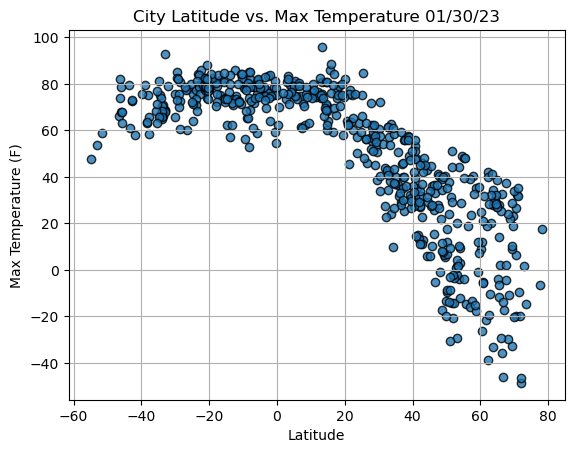

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

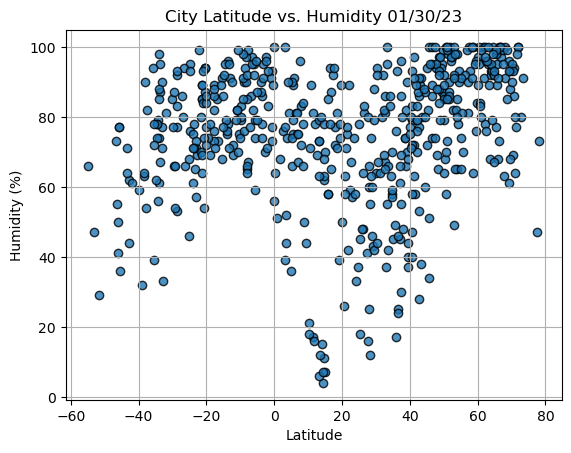

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

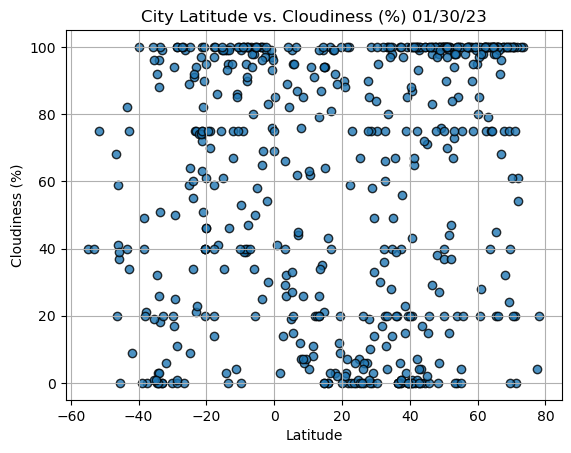

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

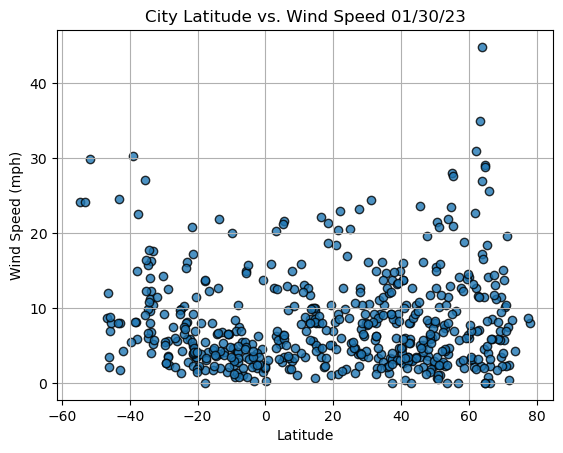

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                   Nanortalik
Lat                       60.1432
Lng                      -45.2371
Max Temp                    24.93
Humidity                       89
Cloudiness                     80
Wind Speed                  14.14
Country                        GL
Date          2023-01-30 23:39:20
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,70.50,70,64,8.03,CV,2023-01-30 23:39:09
1,Tourlaville,49.6383,-1.5664,40.42,87,100,2.30,FR,2023-01-30 23:39:09
4,Klaksvik,62.2266,-6.5890,41.92,78,100,31.00,FO,2023-01-30 23:39:11
5,Saskylakh,71.9167,114.0833,-48.60,100,61,0.40,RU,2023-01-30 23:39:12
6,Avera,33.1940,-82.5271,57.25,95,100,3.31,US,2023-01-30 23:39:12


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

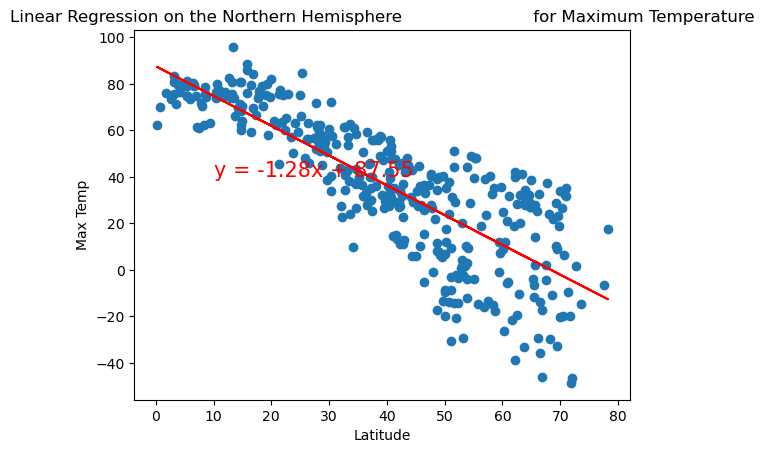

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

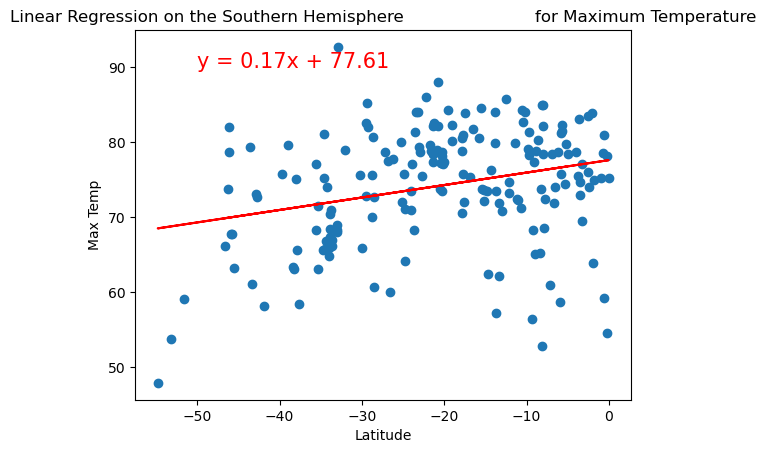

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

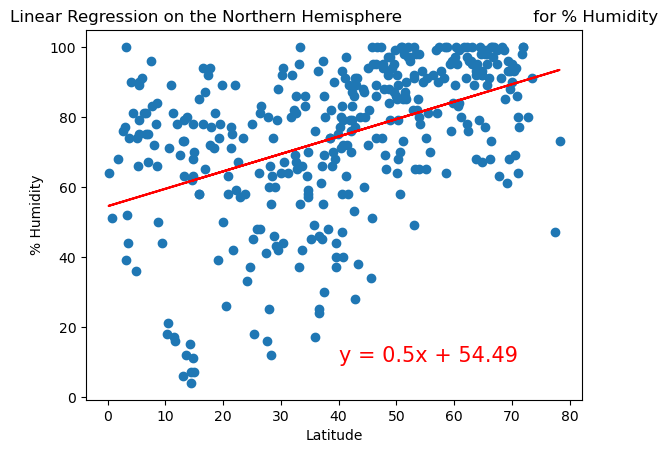

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

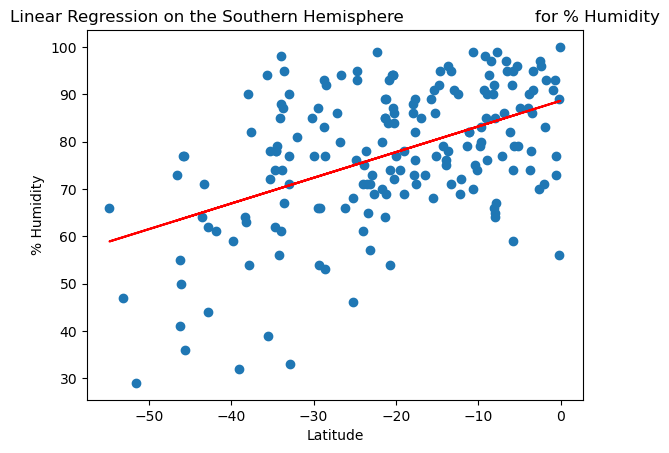

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

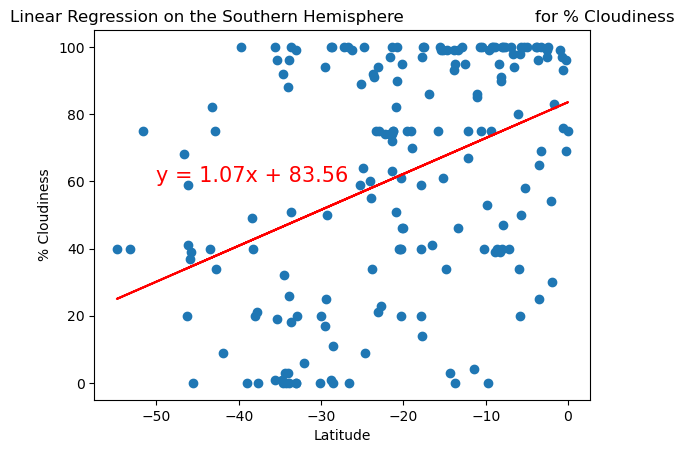

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

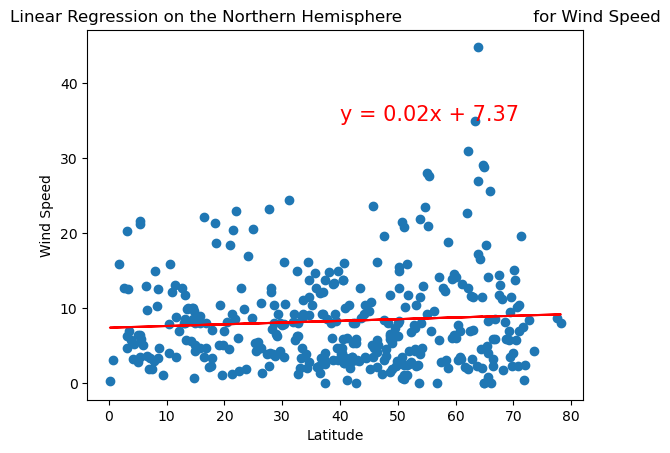

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

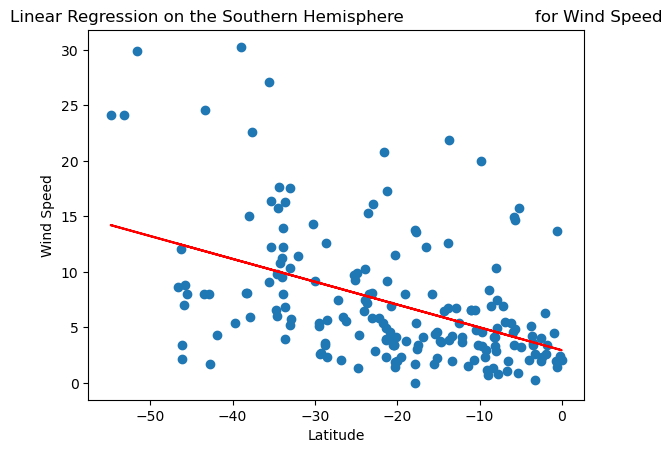

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))